## Understanding how hyperparmeter 'C' affect performance of SVM

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:

# Load the digits dataset
digits = datasets.load_digits()

In [5]:

# Display some basic information about the dataset
print(f"Number of samples: {len(digits.images)}")
print(f"Shape of each sample image: {digits.images[0].shape}")

Number of samples: 1797
Shape of each sample image: (8, 8)


In [6]:

# Create a DataFrame using the digits data
df = pd.DataFrame(data=digits.data)
df['target'] = digits.target

In [7]:
# Display the first few rows of the DataFrame
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
df.to_csv('test.csv')

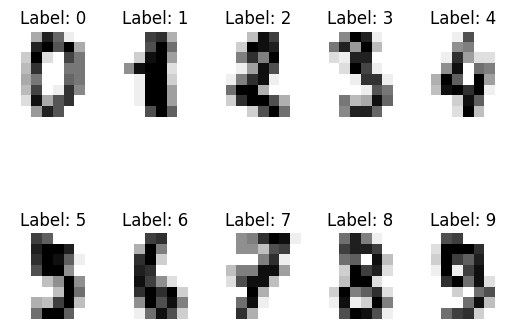

In [9]:
# Visualize a few digits
_, axes = plt.subplots(2, 5)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes.flatten(), images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")
plt.show()

In [10]:

# Split data into features (X) and labels (y)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Labels

In [11]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Train a Support Vector Machine (SVM) model
svm_model = SVC(gamma=0.001)
svm_model.fit(X_train, y_train)

SVC(gamma=0.001)

In [14]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [15]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  0  0  0  1  0 57]]


In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.98      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [ ]:

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9907407407407407


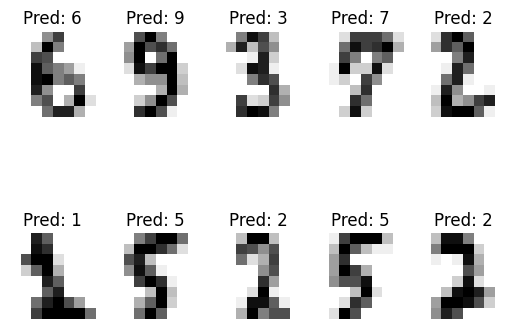

In [ ]:
# Visualize the predicted results for the second model
_, axes = plt.subplots(2, 5)
images_and_predictions_2 = list(zip(X_test.values.reshape(-1, 8, 8), y_pred))
for ax, (image, prediction) in zip(axes.flatten(), images_and_predictions_2[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {prediction}")
plt.show()

##Understanding the impact of C hyperparameter

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


### Model Performance with C=0.01 ###
Accuracy Score: 0.09259259259259259
Confusion Matrix:
[[ 0 53  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0  0]
 [ 0 66  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.09      1.00      0.17        50
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00        43
           

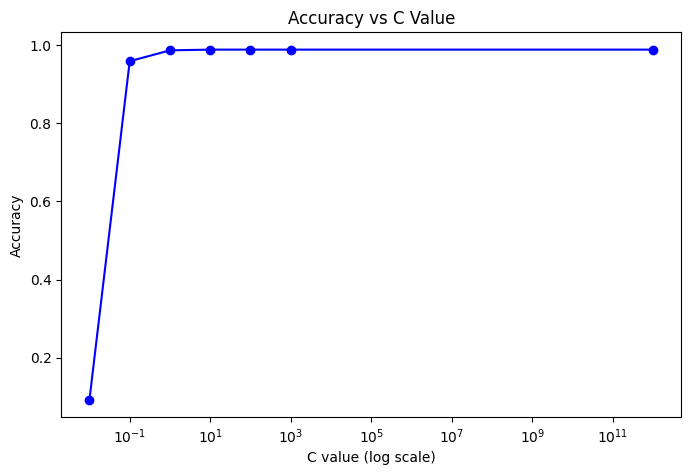

In [ ]:


# Try different values of C
C_values = [0.01, 0.1, 1, 10, 100,1000,1000000000000]

# Create lists to store accuracy scores
accuracy_scores = []
confusion_matrices = []
classification_reports = []

for C in C_values:
    # Train a Support Vector Machine (SVM) model with the current C value
    svm_model = SVC(C=C)
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model and store results
    acc_score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc_score)

    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred))

    # Print the performance for the current C value
    print(f"\n### Model Performance with C={C} ###")
    print(f"Accuracy Score: {acc_score}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Visualize the accuracy for different values of C
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C Value')
plt.show()
